In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import classification_report

In [14]:
df = pd.read_csv('clientes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   cliente_id                100000 non-null  object 
 1   idade                     100000 non-null  int64  
 2   salario_mensal            100000 non-null  float64
 3   score_credito             100000 non-null  int64  
 4   tempo_emprego_anos        100000 non-null  int64  
 5   estado_civil              100000 non-null  object 
 6   possui_imovel             100000 non-null  int64  
 7   possui_veiculo            100000 non-null  int64  
 8   qtd_cartoes_credito       100000 non-null  int64  
 9   historico_inadimplencia   100000 non-null  int64  
 10  valor_credito_solicitado  100000 non-null  float64
 11  dividas_banco_A           100000 non-null  int64  
 12  dividas_banco_B           100000 non-null  int64  
 13  dividas_banco_C           100000 non-null  in

In [15]:
df.head()

,cliente_id,idade,salario_mensal,score_credito,tempo_emprego_anos,estado_civil,possui_imovel,possui_veiculo,qtd_cartoes_credito,historico_inadimplencia,valor_credito_solicitado,dividas_banco_A,dividas_banco_B,dividas_banco_C,dividas_totais,aprovado
0,C000000,56,5402.76,723,5,Viúvo,0,0,0,0,20862.38,0,0,1,1,1
1,C000001,69,8485.78,637,15,Divorciado,0,1,3,0,39910.96,0,0,0,0,1
2,C000002,46,3976.24,366,9,Solteiro,1,0,2,1,11416.72,0,0,0,0,0
3,C000003,32,3777.67,611,10,Divorciado,0,1,2,0,11761.64,0,0,0,0,1
4,C000004,60,4813.60,824,29,Divorciado,1,1,1,0,10765.56,0,1,1,2,0


### Trainamento

In [16]:
X = df.drop(columns=['cliente_id', 'aprovado'])
y = df['aprovado']

In [17]:
cat_cols = ['estado_civil']
num_cols = [col for col in X.columns if col not in cat_cols]

In [18]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [20]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

# Early stopping
es = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True)

# Treinamento
model.fit(
    X_train_processed, 
    y_train, 
    validation_split=0.2, 
    epochs=30, 
    batch_size=128, 
    callbacks=[es])


Epoch 1/30


c:\Users\cs134\OneDrive\Área de Trabalho\PROJETO BAHIA\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8280 - loss: 0.3607 - val_accuracy: 0.9665 - val_loss: 0.0870
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9581 - loss: 0.1006 - val_accuracy: 0.9869 - val_loss: 0.0407
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0539 - val_accuracy: 0.9912 - val_loss: 0.0265
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0343 - val_accuracy: 0.9949 - val_loss: 0.0183
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0259 - val_accuracy: 0.9951 - val_loss: 0.0148
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0195 - val_accuracy: 0.9964 - val_loss: 0.0118
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9930 - loss: 0.0173 - val_accuracy: 0.9960 - val_loss: 0.0118
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9943 - loss: 0.0144 - val_accuracy: 0.9965 - val_

In [21]:
joblib.dump(preprocessor, 'preprocessor.gz')

['preprocessor.gz']

## Avaliando o modelo

In [22]:
def plot_learning_curves(history):
    plt.figure(figsize=(14, 5))

    # Curva de Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss - Treino')
    plt.plot(history.history['val_loss'], label='Loss - Validação')
    plt.title('Curva de Loss')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    # Curva de Acurácia
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Acurácia - Treino')
    plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
    plt.title('Curva de Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [23]:
loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9977 - loss: 0.0068
Acurácia no conjunto de teste: 0.9978


## Curvas de Erro

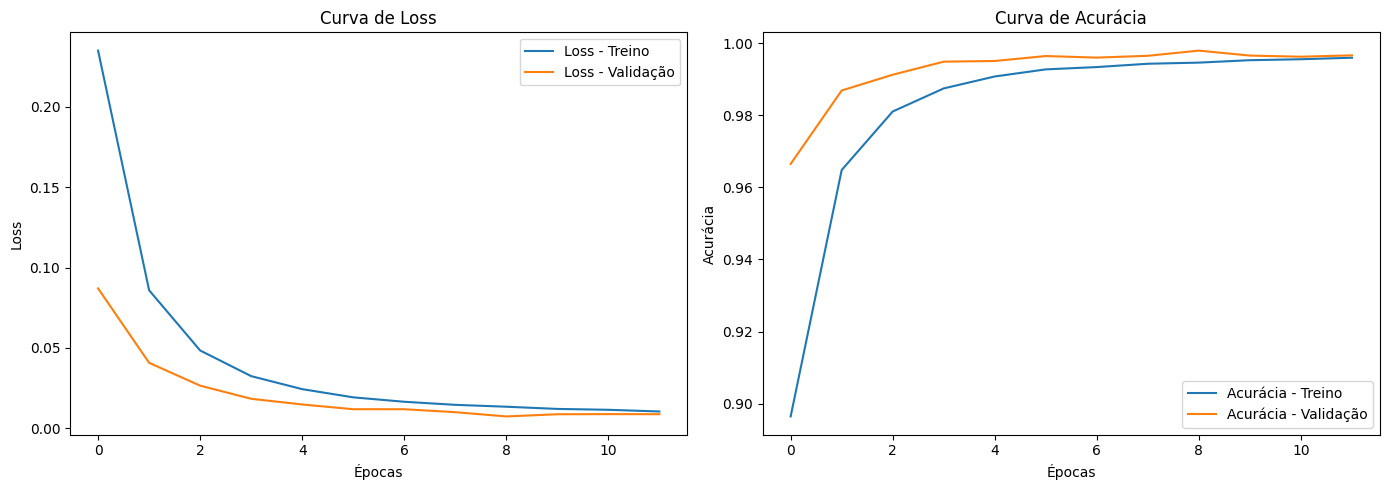

In [24]:
plot_learning_curves(model.history)

O modelo conseguiu aprender bem, considerando a curva de erro e de acurácia

## Verificando possíveis enviesamentos

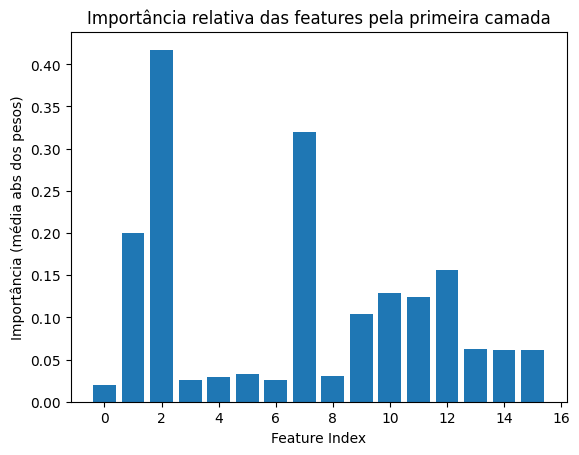

In [25]:
weights, biases = model.layers[0].get_weights()

importance = np.mean(np.abs(weights), axis=1)

plt.bar(range(len(importance)), importance)
plt.xlabel('Feature Index')
plt.ylabel('Importância (média abs dos pesos)')
plt.title('Importância relativa das features pela primeira camada')
plt.show()

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step   
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


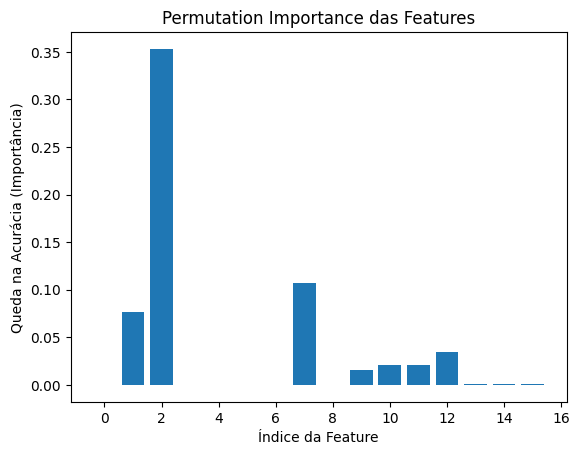

In [26]:
X_val = X_train_processed
y_val = y_train

# performance original
y_pred_orig = (model.predict(X_val) > 0.5).astype(int)
base_acc = accuracy_score(y_val, y_pred_orig)

importances = []

for i in range(X_val.shape[1]):
    X_val_permuted = X_val.copy()
    np.random.shuffle(X_val_permuted[:, i])  # embaralha feature i

    y_pred_permuted = (model.predict(X_val_permuted) > 0.5).astype(int)
    permuted_acc = accuracy_score(y_val, y_pred_permuted)

    importance = base_acc - permuted_acc  # quanto piorou a acurácia ao embaralhar essa feature
    importances.append(importance)

# Visualizar importância
import matplotlib.pyplot as plt
plt.bar(range(len(importances)), importances)
plt.xlabel('Índice da Feature')
plt.ylabel('Queda na Acurácia (Importância)')
plt.title('Permutation Importance das Features')
plt.show()

Temos 7 features importantes no processo de treinamento, vamos criar outro modelo apenas com essas 7 features e ver o que acontece.

In [29]:
importances = np.array(importances)
top_features_idx = np.argsort(importances)[::-1][:7]

X_train_top7 = X_train_processed[:, top_features_idx]
X_val_top7 = X_test_processed[:, top_features_idx]

print(X_train_top7.shape)
print(y_train.shape)


(80000, 7)
(80000,)


In [31]:
model_top7 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_top7.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_top7.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy'])

es = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True)

history_top7 = model_top7.fit(
    X_train_top7, y_train,
    validation_data=(X_val_top7, y_test),  # usar y_test para validação
    epochs=100,
    batch_size=128,
    callbacks=[es]
)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8580 - loss: 0.3208 - val_accuracy: 0.9893 - val_loss: 0.0457
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0594 - val_accuracy: 0.9962 - val_loss: 0.0225
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9877 - loss: 0.0327 - val_accuracy: 0.9984 - val_loss: 0.0134
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0227 - val_accuracy: 0.9969 - val_loss: 0.0106
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9944 - loss: 0.0158 - val_accuracy: 0.9978 - val_loss: 0.0081
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9951 - loss: 0.0128 - val_accuracy: 0.9979 - val_loss: 0.0065
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9962 - loss: 0.0103 - val_accuracy: 0.9972 - val_loss: 0.0064
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9965 - loss: 0.0092 - val_accu

In [33]:
loss, acc = model_top7.evaluate(X_val_top7, y_test)
print(f"Acurácia com 7 features: {acc:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9992 - loss: 0.0017
Acurácia com 7 features: 0.9990


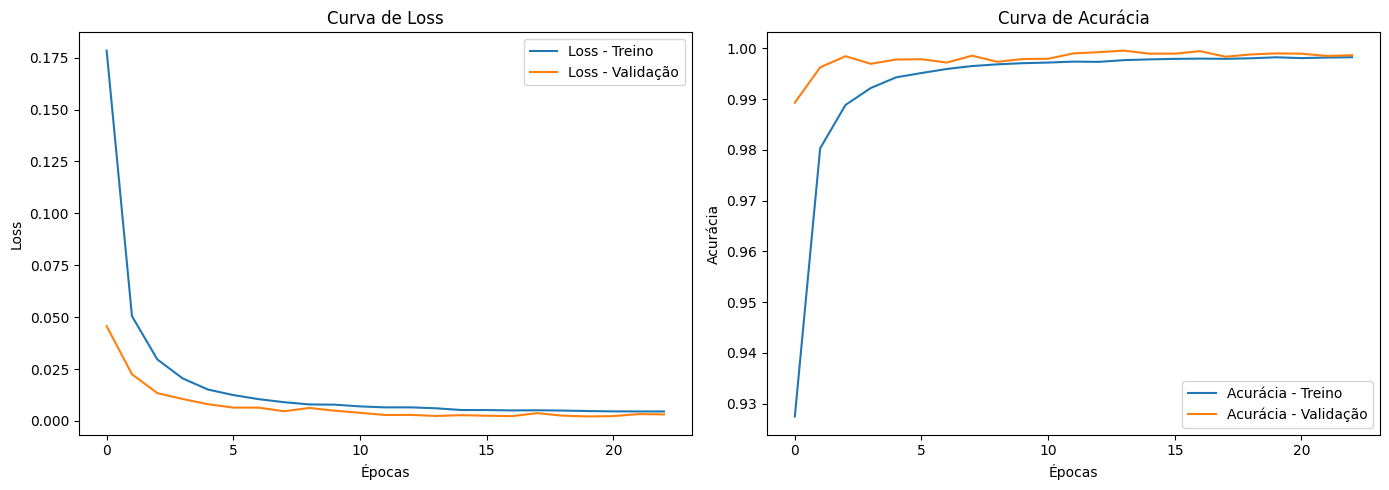

In [34]:
plot_learning_curves(model_top7.history)

## Classification Reports para MODEL_TOP7

In [35]:
X_test_top7 = X_test_processed[:, top_features_idx]

y_pred_probs_top7 = model_top7.predict(X_test_top7)
y_pred_top7 = (y_pred_probs_top7 > 0.5).astype("int32")

# Avaliação
print(classification_report(y_test, y_pred_top7))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12870
           1       1.00      1.00      1.00      7130

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



## Classification Reports para MODEL

In [36]:
# Fazer previsões
y_pred_probs = model.predict(X_test_processed)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Avaliação
print(classification_report(y_test, y_pred))


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12870
           1       1.00      1.00      1.00      7130

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



## Vou trabalhar com model_top7, porque teve uma taxa de erro menor e acurácia maior.

In [37]:
# Gerar score entre 0 e 1000 com o model_top7
risk_scores = y_pred_probs_top7.flatten() * 1000

df_resultado_top7 = X_test.copy()
df_resultado_top7["score_risco"] = risk_scores
df_resultado_top7["aprovado_previsto"] = y_pred_top7
df_resultado_top7["aprovado_real"] = y_test.values


In [38]:
df_resultado_top7.sort_values("score_risco", ascending=False).head(50)


,idade,salario_mensal,score_credito,tempo_emprego_anos,estado_civil,possui_imovel,possui_veiculo,qtd_cartoes_credito,historico_inadimplencia,valor_credito_solicitado,dividas_banco_A,dividas_banco_B,dividas_banco_C,dividas_totais,score_risco,aprovado_previsto,aprovado_real
45745,60,10791.78,896,9,Divorciado,0,1,0,0,20103.92,0,0,0,0,999.999878,1,1
97606,36,11261.71,806,19,Viúvo,0,0,0,0,11902.22,0,0,0,0,999.999695,1,1
8650,49,11149.34,807,12,Viúvo,0,1,0,0,17177.88,0,0,0,0,999.999695,1,1
47329,38,10119.31,871,11,Casado,0,1,3,0,21726.96,0,0,0,0,999.999695,1,1
56691,38,10594.34,840,16,Viúvo,0,1,3,0,5159.37,0,0,0,0,999.999695,1,1
73065,36,11765.14,761,11,Viúvo,0,1,2,0,20372.07,0,0,0,0,999.999695,1,1
54042,66,10091.73,841,2,Casado,1,0,0,0,18595.60,0,0,0,0,999.999512,1,1
99316,60,10521.76,809,16,Viúvo,0,0,0,0,1000.00,0,0,0,0,999.999512,1,1
32873,44,9219.23,895,21,Divorciado,0,1,3,0,8215.67,0,0,0,0,999.999451,1,1
74671,31,10063.75,831,14,Divorciado,0,0,1,0,25077.37,0,0,0,0,999.999451,1,1


## Salvando os modelos e as features necessárias

In [39]:
np.save("top_features_idx.npy", top_features_idx)
model_top7.save("modelo_top7.keras")

In [40]:
top_features_idx = np.load("top_features_idx.npy", allow_pickle=True)

# Mostra o conteúdo
print(top_features_idx)

[ 2  7  1 12 11 10  9]
